In [1]:
# The meat and veggies
import tensorflow as tf
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt

# Helpers from SkLearn
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [2]:
# Import health insurance cost dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [3]:
# Checking if data has any null values, which is does not
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Okay - No null values. Pretty straightforward path here we're going to have to make some transformations on the non-numerical columns

In [4]:
transformed_columns = make_column_transformer(
                                                (MinMaxScaler(), ['age', 'bmi', 'children']),
                                                (OneHotEncoder(), ['sex', 'smoker', 'region'])
                                              )
transformed_columns

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('minmaxscaler',
                                 MinMaxScaler(copy=True, feature_range=(0, 1)),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 ['sex', 'smoker', 'region'])],
                  verbose=False)

I've transformed these columns using `MinMaxScaler()` and `OneHotEncoder()` - I used `MinMaxScaler()` across the `age`, `bmi`, and `children` columns to preserve the distribution among these columns and the `OneHotEndoer()` across the `sex`, `smoker`, and `region` columns because the data was not in numerical format and that is necessary for what we're trying to achieve here.

# Now it's time to split the data, build the model and train it on the newly transformed data columns

In [5]:
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

transformed_columns.fit(X_train)

X_train_normalized = transformed_columns.transform(X_train)
X_test_normalized = transformed_columns.transform(X_test)


model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=["mae"])

model_1.fit(X_train_normalized, y_train, epochs=100, verbose=0)

# Little function to return our eval metrics

In [6]:
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.constant(tf.squeeze(y_pred)).numpy())

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_preds=tf.constant(tf.squeeze(y_preds)).numpy())

In [7]:
y_preds = model_1.predict(X_test_normalized)
mae(y_test, y_preds)

<tf.Tensor: shape=(), dtype=float32, numpy=3478.4192>

In [8]:
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1, activation="linear")
])

model_2.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

model_2.fit(X_train_normalized, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 2ms/step - loss: 13890.2348 - mae: 13890.2348
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13055.7104 - mae: 13055.7104
Epoch 3/200
34/34 [==============================] - 0s 1ms/step - loss: 13607.4070 - mae: 13607.4070
Epoch 4/200
34/34 [==============================] - 0s 1ms/step - loss: 13912.8733 - mae: 13912.8733
Epoch 5/200
34/34 [==============================] - 0s 1ms/step - loss: 13143.7948 - mae: 13143.7948
Epoch 6/200
34/34 [==============================] - 0s 1ms/step - loss: 13232.5243 - mae: 13232.5243
Epoch 7/200
34/34 [==============================] - 0s 1ms/step - loss: 13517.9834 - mae: 13517.9834
Epoch 8/200
34/34 [==============================] - 0s 1ms/step - loss: 13030.6538 - mae: 13030.6538
Epoch 9/200
34/34 [==============================] - 0s 1ms/step - loss: 13045.5010 - mae: 13045.5010
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 13208.27

In [9]:
y_preds_2 = model_2.predict(X_test_normalized)
mae(y_test, y_preds_2)

<tf.Tensor: shape=(), dtype=float32, numpy=3230.0671>

In [10]:
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation="relu"),
  tf.keras.layers.Dense(256, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="linear")
])

model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])

model_3.fit(X_train_normalized, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13834.4296 - mae: 13834.4296
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13029.5112 - mae: 13029.5112
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 9419.7881 - mae: 9419.7881
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7857.6375 - mae: 7857.6375
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7041.8664 - mae: 7041.8664
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 6874.4756 - mae: 6874.4756
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 6215.7258 - mae: 6215.7258
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 4940.1419 - mae: 4940.1419
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 3757.7704 - mae: 3757.7704
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 3475.7207 - mae: 3475.

In [11]:
y_preds_3 = model_3.predict(X_test_normalized)

In [12]:
mae(y_test, y_preds_3)

<tf.Tensor: shape=(), dtype=float32, numpy=1839.0972>

# We have gotten some significant improvements model to model - Now let's make some visualizations!

### Since we're going to be plotting 3 model's results, it makes sense to make a function so we don't get carpel tunnel retyping!

In [25]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test_normalized, test_labels=y_test, preds=y_preds):
  """
  Plots the training and test data and compares the predictions to the ground truth labels
  """
  plt.figure(figsize=(10, 7))

  # Training data - Blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")

  # Testing data - Green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")

  # Predictions - Red
  plt.scatter(test_data, preds, c="r", label="Predictions")

  # Legend because who doesn't like a legend?
  plt.legend();

ValueError: ignored

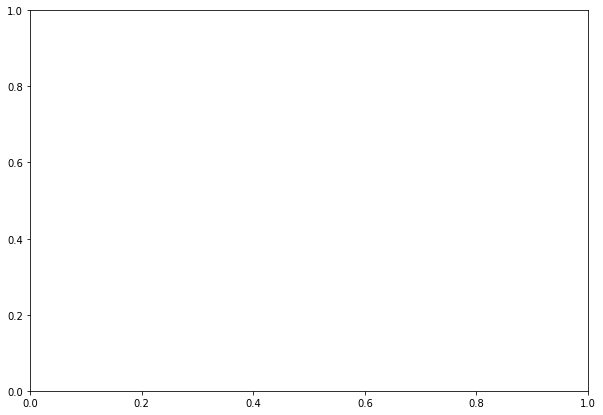

In [24]:
plot_predictions()